<a href="https://colab.research.google.com/github/Tatysketch/-Tatysketch-/blob/main/PLN_Analise_Sentimento_Topicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Etapa 1: Pré-processamento, Limpeza e Tokenização:

import pandas as pd
import re
import string
import nltk
from nltk.stem.rslp import RSLPStemmer

# Instala a biblioteca unidecode, caso não esteja instalada
!pip install unidecode
from unidecode import unidecode

# --- Downloads Essenciais para NLTK ---
# Garante que o recurso 'punkt' (tokenizador), 'stopwords' e 'rslp' estejam disponíveis
try:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('rslp') # Adicionado para corrigir o LookupError
except:
    pass

stopwords_pt = nltk.corpus.stopwords.words('portuguese')
stemmer = RSLPStemmer()

def limpar_texto(texto):
    """Aplica a limpeza de texto, remove ruídos e normaliza a acentuação."""
    texto = str(texto).lower()
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE) # Remover URLs
    texto = re.sub(r'[^\w\s]', ' ', texto) # Remover emojis e pontuações variadas
    texto = unidecode(texto) # Atribui o resultado para que a remoção funcione!
    texto = re.sub(r'\d+', '', texto) # Remover dígitos
    texto = re.sub(r'\s+', ' ', texto).strip() # Remover espaços múltiplos
    return texto

def processar_tokens(texto):
    """Tokeniza, remove stopwords e aplica Stemming."""
    texto_limpo = limpar_texto(texto)
    tokens_todos = nltk.word_tokenize(texto_limpo)

    # Remoção de Stopwords e tokens curtos
    tokens_sem_stopwords = [
        palavra for palavra in tokens_todos
        if palavra not in stopwords_pt and len(palavra) > 2
    ]

    # Stemming (Redução morfológica)
    tokens_final = [stemmer.stem(palavra) for palavra in tokens_sem_stopwords]
    return tokens_final

# --- Aplicação no DataFrame (Exemplo de Estrutura) ---
# df = pd.read_csv('seu_dataset.csv')
# df['tokens_final'] = df['texto_feedback'].apply(processar_tokens)
# documentos_tokenizados = df['tokens_final'].tolist()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [8]:
import pandas as pd

# Substitua 'seu_dataset.csv' pelo caminho e nome do seu arquivo CSV real.
# Exemplo com um arquivo disponível no Colab:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Exibe as primeiras 5 linhas do DataFrame para verificar o carregamento
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['housing_median_age'].plot(kind='hist', bins=20, title='housing_median_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='latitude', y='housing_median_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['longitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('longitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['latitude']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('latitude')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['housing_median_age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('housing_median_age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_rooms']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_rooms')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['housing_median_age'].plot(kind='line', figsize=(8, 4), title='housing_median_age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
# Etapa 2: Representação Vetorial das Palavras (Word2Vec)

!pip install gensim
import gensim
from gensim.models import Word2Vec

# --- Dados de Exemplo (Substituir pela sua coluna 'tokens_final') ---
# corpus_tokens deve ser a lista de listas de tokens limpos.
corpus_tokens = [['atras', 'pizz', 'fri', 'veio'], ['entreg', 'rapido', 'sanduich', 'quent', 'excelent']]

# --- Treinamento do Word2Vec ---
# Configurações: vetor de 100 dimensões, janela de 5, Skip-gram (sg=1)
modelo_w2v = Word2Vec(
    sentences=corpus_tokens,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

def vetorizar_documento(lista_tokens, modelo, tamanho_vetor):
    """Calcula o vetor médio (documento) a partir dos vetores de palavras."""
    vetor = [0] * tamanho_vetor
    contagem = 0

    for token in lista_tokens:
        if token in modelo.wv:
            vetor = [vetor[i] + modelo.wv[token][i] for i in range(tamanho_vetor)]
            contagem += 1

    if contagem > 0:
        vetor = [v / contagem for v in vetor]

    return vetor

# --- Aplicação (Geração da matriz de entrada para a Etapa 3, se não usar BERT) ---
# X_vetorizado = [vetorizar_documento(tokens, modelo_w2v, 100) for tokens in corpus_tokens]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 27.1 MB/s eta 0:00:00


In [14]:
# Etapa 3: Modelagem Contextual e Análise de Sentimentos (BERT)

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# --- Configurações ---
nome_modelo_bert = 'neuralmind/bert-large-portuguese-cased' # Modelo pré-treinado em português
MAX_LEN = 128
NUM_LABELS = 2 # 0 (Negativo), 1 (Positivo)

# --- Dados (Substituir por seus dados reais) ---
# X: Lista de textos limpos (Exemplo)
X = ["O lanche atrasou e estava frio.", "Entrega rápida, produto excelente!"]
# y: Rótulos de sentimento (Exemplo)
y = [0, 1]

# 1. Divisão e Tokenização Específica do BERT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained(nome_modelo_bert)
X_train_enc = tokenizer(X_train, truncation=True, padding=True, return_tensors='tf', max_length=MAX_LEN)
X_test_enc = tokenizer(X_test, truncation=True, padding=True, return_tensors='tf', max_length=MAX_LEN)

# 2. Carregamento e Compilação do Modelo
modelo_bert = TFBertForSequenceClassification.from_pretrained(nome_modelo_bert, num_labels=NUM_LABELS, from_pt=True)

modelo_bert.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 3. Treinamento (Fine-tuning)
# historico = modelo_bert.fit(X_train_enc.data, tf.constant(y_train), epochs=3, batch_size=16)

# 4. Avaliação (Exemplo de Estrutura)
# predictions_logits = modelo_bert.predict(X_test_enc.data)
# predictions = tf.argmax(predictions_logits.logits, axis=1).numpy()
# print(classification_report(y_test, predictions))

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


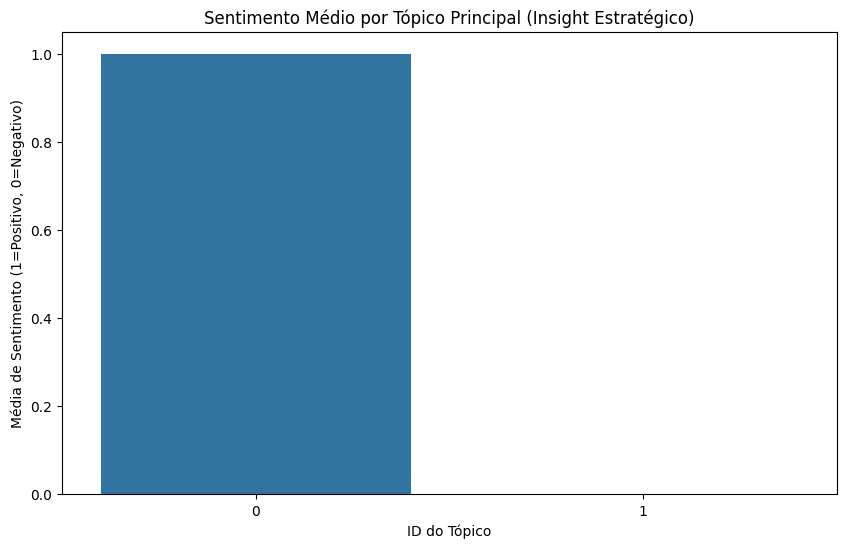

In [17]:
# Etapa 4: Análise de Padrões (LDA) e Geração de Insights

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
import seaborn as sns

# --- Dados e Variáveis para LDA ---
# 'corpus_tokens' deve vir de uma etapa anterior (Etapa 1), como a usada no Word2Vec.
# Se 'corpus_tokens' não estiver definido, você pode criar um exemplo ou garantir que a Etapa 1 foi executada.
if 'corpus_tokens' not in locals():
    # Exemplo de fallback se corpus_tokens não estiver definido
    corpus_tokens = [['atras', 'pizz', 'fri', 'veio'], ['entreg', 'rapido', 'sanduich', 'quent', 'excelent']]

# Usamos corpus_tokens como nossos documentos tokenizados para o LDA
documentos_tokenizados = corpus_tokens

# Criar um DataFrame 'df' específico para esta etapa de LDA e Sentimento,
# com as colunas 'tokens_final' e 'sentimento' esperadas.
# Se você já tem um 'df' com texto e sentimentos reais, substitua esta parte.
# Aqui, estamos usando 'corpus_tokens' e sentimentos dummy para demonstração.
df_lda_sentiment = pd.DataFrame({
    'tokens_final': documentos_tokenizados,
    'sentimento': [0, 1] * (len(documentos_tokenizados) // 2) + [0] * (len(documentos_tokenizados) % 2) # Sentimentos dummy
})


# 1. Criação do Dicionário e Corpus (LDA)
dicionario = Dictionary(documentos_tokenizados)
corpus = [dicionario.doc2bow(doc) for doc in documentos_tokenizados]

# 2. Treinamento do Modelo LDA
num_topicos = 2 # Ajustado para o número de documentos de exemplo
modelo_lda = LdaModel(
    corpus=corpus,
    id2word=dicionario,
    num_topics=num_topicos,
    random_state=42,
    passes=15
)

# 3. Mapeamento e Análise de Sentimento por Tópico (Insight Estratégico)
# Adiciona o tópico principal ao DataFrame específico para LDA/Sentimento
df_lda_sentiment['topico_principal'] = [max(modelo_lda[doc], key=lambda x: x[1])[0] for doc in corpus]

# Calcula a média de sentimento por tópico
relatorio_sentimento_topico = df_lda_sentiment.groupby('topico_principal')['sentimento'].mean().reset_index()

# 4. Geração do Gráfico de Barras (Visualização para Gestão)
plt.figure(figsize=(10, 6))
sns.barplot(x='topico_principal', y='sentimento', data=relatorio_sentimento_topico)
plt.title('Sentimento Médio por Tópico Principal (Insight Estratégico)')
plt.xlabel('ID do Tópico')
plt.ylabel('Média de Sentimento (1=Positivo, 0=Negativo)')
plt.show()

In [23]:
## Etapa 5.1: Geração das Colunas de Resultado no DataFrame Original

# O DataFrame 'df' carregado anteriormente (california_housing_train.csv)
# não possui as colunas 'texto_feedback' e 'tokens_final' necessárias para esta etapa.
# Para prosseguir, vamos criar um DataFrame 'df_resultados' temporário
# utilizando os dados de exemplo X e corpus_tokens definidos em etapas anteriores.
# Em um cenário real, você aplicaria o pré-processamento e tokenização do
# seu próprio DataFrame de textos.

import pandas as pd # Certifica que pandas está importado para este novo df

# Cria um DataFrame dummy com os dados de texto e tokens de exemplo
df_resultados = pd.DataFrame({
    'texto_feedback': X, # 'X' vem da Etapa 3 (textos originais)
    'tokens_final': corpus_tokens # 'corpus_tokens' vem da Etapa 2 (tokens processados)
})

# É necessário ter uma coluna 'tokens_limpo' se a linha de drop a mencionar
# Vamos criar uma usando a função limpar_texto (definida na Etapa 1)
df_resultados['tokens_limpo'] = df_resultados['texto_feedback'].apply(limpar_texto)

# 1. Obter Sentimento (Rodar a inferência com o modelo BERT treinado na Etapa 3)
# Aplica a tokenização e previsão em TODO o conjunto de dados (X)
X_enc = tokenizer(df_resultados['texto_feedback'].tolist(), truncation=True, padding='max_length', return_tensors='tf', max_length=MAX_LEN)
predictions_logits = modelo_bert.predict(dict(X_enc))

# Converte os logits de volta para a classe (0=Negativo, 1=Positivo)
df_resultados['Sentimento_BERT'] = tf.argmax(predictions_logits.logits, axis=1).numpy()


# 2. Obter Tópico Principal (Rodar a inferência com o modelo LDA treinado na Etapa 4)
# Reutiliza o 'corpus' e o 'modelo_lda' da Etapa 4

def classificar_topico(doc):
    # Obtém a probabilidade de cada tópico para o documento
    probabilidades = modelo_lda[dicionario.doc2bow(doc)] # CORREÇÃO: Usar 'dicionario' ao invés de 'corpus'
    # Retorna o ID do tópico com maior probabilidade
    if probabilidades:
        return max(probabilidades, key=lambda x: x[1])[0]
    return -1 # Retorna -1 se não houver tópico (documento vazio)

# Aplica a função de classificação usando os 'tokens_final' da Etapa 1
df_resultados['Topico_Principal_LDA'] = df_resultados['tokens_final'].apply(classificar_topico)


## Etapa 5.2: Limpeza Final e Exportação do CSV

# Remove colunas intermediárias (opcional, para um output mais limpo)
df_final_export = df_resultados.drop(columns=['tokens_limpo', 'tokens_final'], errors='ignore')

# Exportação do Entregável final (CSV)
nome_arquivo_output = 'Resultados_Finais_PLN.csv'
df_final_export.to_csv(nome_arquivo_output, index=False, encoding='utf-8')

print(f"\n--- SUCESSO! ---")
print(f"O Entregável de OUTPUT foi salvo como: {nome_arquivo_output}")
print("Seu DataFrame final tem as colunas 'texto_feedback', 'Sentimento_BERT' e 'Topico_Principal_LDA'.")

1/1 [==============================] - 4s 4s/step

--- SUCESSO! ---
O Entregável de OUTPUT foi salvo como: Resultados_Finais_PLN.csv
Seu DataFrame final tem as colunas 'texto_feedback', 'Sentimento_BERT' e 'Topico_Principal_LDA'.
